In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl
import matplotlib.pyplot as plt

In [1]:
reviews_train = []
for line in open('positive.txt', 'r'):
    reviews_train.append(line.strip())
for line in open('negative.txt', 'r'):
    reviews_train.append(line.strip())

In [2]:
reviews_test = []
for line in open('positive_test.txt', 'r'):
    reviews_test.append(line.strip())
for line in open('negative_test.txt', 'r'):
    reviews_test.append(line.strip())

In [5]:
cv = CountVectorizer(binary=True)
cv.fit(reviews_train)
X = cv.transform(reviews_train)
X_test = cv.transform(reviews_test)

In [7]:
y = np.ones(25000)
y[12500:25000] = 0
y_test = np.ones(25000)
y_test[12500:25000] = 0

In [16]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75
)

In [21]:
max_depths = np.linspace(15, 100, 15, dtype=int, endpoint=True)
print(max_depths)

[ 15  21  27  33  39  45  51  57  63  69  75  81  87  93 100]


In [22]:
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    print ("Accuracy for max_depth=%s: %s" 
           % (max_depth, accuracy_score(y_val, dt.predict(X_val))))

Accuracy for max_depth=15: 0.72432
Accuracy for max_depth=21: 0.72768
Accuracy for max_depth=27: 0.73632
Accuracy for max_depth=33: 0.72976
Accuracy for max_depth=39: 0.724
Accuracy for max_depth=45: 0.73072
Accuracy for max_depth=51: 0.72416
Accuracy for max_depth=57: 0.7264
Accuracy for max_depth=63: 0.7248
Accuracy for max_depth=69: 0.724
Accuracy for max_depth=75: 0.71712
Accuracy for max_depth=81: 0.72512
Accuracy for max_depth=87: 0.72208
Accuracy for max_depth=93: 0.7136
Accuracy for max_depth=100: 0.7152


In [24]:
max_depths_v2 = np.linspace(15, 50, 15, dtype=int, endpoint=True)
print(max_depths_v2)

[15 17 20 22 25 27 30 32 35 37 40 42 45 47 50]


In [56]:
train_results = []
val_results = []
for max_depth in max_depths_v2:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    results.append(accuracy_score(y_val, dt.predict(X_val)))
    print ("Accuracy for max_depth=%s: %s" 
           % (max_depth, accuracy_score(y_val, dt.predict(X_val))))
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)
    

Accuracy for max_depth=15: 0.72688
Accuracy for max_depth=17: 0.7288
Accuracy for max_depth=20: 0.7296
Accuracy for max_depth=22: 0.7296
Accuracy for max_depth=25: 0.7304
Accuracy for max_depth=27: 0.73648
Accuracy for max_depth=30: 0.7336
Accuracy for max_depth=32: 0.73408
Accuracy for max_depth=35: 0.73104
Accuracy for max_depth=37: 0.73056
Accuracy for max_depth=40: 0.73504
Accuracy for max_depth=42: 0.72704
Accuracy for max_depth=45: 0.72656
Accuracy for max_depth=47: 0.728
Accuracy for max_depth=50: 0.72528


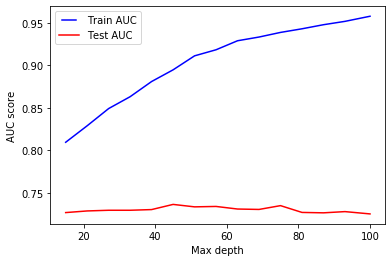

In [61]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, val_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max depth')
plt.show()

In [64]:
# We will use max_depth = 47
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
results_samples_splits = []

train_results = []
val_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(max_depth=47, min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    results_samples_splits.append(accuracy_score(y_val, dt.predict(X_val)))
    print ("Accuracy for min_samples_split=%s: %s" 
           % (min_samples_split, accuracy_score(y_val, dt.predict(X_val))))
    
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    val_results.append(roc_auc)

Accuracy for min_samples_split=0.1: 0.74896
Accuracy for min_samples_split=0.2: 0.7384
Accuracy for min_samples_split=0.30000000000000004: 0.72016
Accuracy for min_samples_split=0.4: 0.70832
Accuracy for min_samples_split=0.5: 0.68736
Accuracy for min_samples_split=0.6: 0.67296
Accuracy for min_samples_split=0.7000000000000001: 0.67296
Accuracy for min_samples_split=0.8: 0.61648
Accuracy for min_samples_split=0.9: 0.61648
Accuracy for min_samples_split=1.0: 0.61648


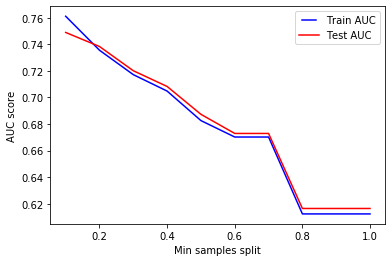

In [65]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, val_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min samples split')
plt.show()
# We will use min_samples_split = 0.1

In [66]:
final_model = DecisionTreeClassifier(max_depth=47, min_samples_split=0.1)
final_model.fit(X, y)
print ("Final Accuracy: %s" 
       % accuracy_score(y, final_model.predict(X_test)))

Final Accuracy: 0.7502


In [70]:
vocab = []
for line in open('vocab.txt', 'r'):
    vocab.append(line.strip())

In [71]:
from sklearn.tree.export import export_text
r = export_text(final_model, vocab)
print(r)

|--- project <= 0.50
|   |--- salva <= 0.50
|   |   |--- pneumonic <= 0.50
|   |   |   |--- sixteen <= 0.50
|   |   |   |   |--- pick <= 0.50
|   |   |   |   |   |--- kar <= 0.50
|   |   |   |   |   |   |--- blaxploitation <= 0.50
|   |   |   |   |   |   |   |--- mccall <= 0.50
|   |   |   |   |   |   |   |   |--- afghan <= 0.50
|   |   |   |   |   |   |   |   |   |--- racked <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- costume <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 28
|   |   |   |   |   |   |   |   |   |   |--- costume >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- racked >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- afghan >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- mccall >  0.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- blaxploitati